# Health Insurance Marketplace Dataset with Pandas

Analysis of the health insurance marketplace dataset from the U.S. Department of Health and Human Services, which was uploaded to [Kaggle on Jan 20, 2016.](https://www.kaggle.com/hhsgov/health-insurance-marketplace)

The dataset consists of health insurance and dental plans offered through healthcare.gov between 2014 and 2016. It encompasses rates for smokers and non-smokers, separately listed for each age group, benefits included in the plans, states in which the plans were offered, and other information. The dataset does not contain any information on actual purchases.

This notebook shows my first exploration of the dataset, a thorough data cleaning, and an analysis of the plan rates with respect to smokers and non-smokers, age groups and U.S. states.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Some options for Pandas and Seaborn:

In [2]:
# Always display all the columns
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 200) 

# Plain Seaborn figures with matplotlib color codes mapped to the default seaborn palette 
sns.set(style="white", color_codes=True)

Import the CSV file containing the health dataset as a Pandas dataframe

In [3]:
df = pd.read_csv("Rate.csv")

## Quick data exploration

When looking at a dataset for the first time, you have basically no idea what to expect. Getting some basic parameters, like number of columns and rows, column headings, and the data format of the columns should be the first step. 

In [4]:
df.shape

(12694445, 24)

In [5]:
df.columns

Index(['BusinessYear', 'StateCode', 'IssuerId', 'SourceName', 'VersionNum', 'ImportDate', 'IssuerId2', 'FederalTIN', 'RateEffectiveDate', 'RateExpirationDate', 'PlanId', 'RatingAreaId', 'Tobacco', 'Age', 'IndividualRate', 'IndividualTobaccoRate', 'Couple', 'PrimarySubscriberAndOneDependent', 'PrimarySubscriberAndTwoDependents', 'PrimarySubscriberAndThreeOrMoreDependents', 'CoupleAndOneDependent', 'CoupleAndTwoDependents', 'CoupleAndThreeOrMoreDependents', 'RowNumber'], dtype='object')

In [6]:
df.dtypes

BusinessYear                                   int64
StateCode                                     object
IssuerId                                       int64
SourceName                                    object
VersionNum                                     int64
ImportDate                                    object
IssuerId2                                      int64
FederalTIN                                    object
RateEffectiveDate                             object
RateExpirationDate                            object
PlanId                                        object
RatingAreaId                                  object
Tobacco                                       object
Age                                           object
IndividualRate                               float64
IndividualTobaccoRate                        float64
Couple                                       float64
PrimarySubscriberAndOneDependent             float64
PrimarySubscriberAndTwoDependents            f

We should now look at the data itself. With head() we can print the first few lines in the dataframe.

In [7]:
df.head()

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
0,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,21989AK0010001,Rating Area 1,No Preference,0-20,29.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
1,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,21989AK0020001,Rating Area 1,No Preference,Family Option,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,14
2,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,21989AK0020001,Rating Area 2,No Preference,Family Option,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,15
3,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,21989AK0010001,Rating Area 1,No Preference,21,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
4,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,21989AK0010001,Rating Area 1,No Preference,22,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16


Now we know what the dataframe roughly looks like. To get an idea what to expect across all the 12 million rows, we can let Pandas summarize the columns containing numerical values: 

In [8]:
df.describe()

,BusinessYear,IssuerId,VersionNum,IssuerId2,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
count,12694445.000000,12694445.000000,12694445.000000,12694445.000000,12694445.000000,4932349.000000,40941.000000,40941.000000,40941.000000,40941.000000,40941.000000,40941.000000,40941.000000,12694445.000000
mean,2015.033525,52485.924252,6.865558,52485.924252,4098.026459,543.691079,48.115714,49.835901,70.660012,89.405494,72.782793,89.012859,107.807774,6348.572395
std,0.794052,26412.626692,3.857180,26412.626692,61222.712586,294.591582,30.422891,29.691985,44.620130,57.699279,48.232537,59.139094,73.241174,9011.434979
min,2014.000000,10046.000000,1.000000,10046.000000,0.000000,41.730000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
25%,2014.000000,30219.000000,4.000000,30219.000000,29.330000,339.120000,26.710000,27.390000,27.910000,29.410000,28.260000,28.260000,29.490000,873.000000
50%,2015.000000,49532.000000,6.000000,49532.000000,291.600000,463.290000,49.770000,51.240000,74.680000,98.800000,77.250000,97.910000,116.710000,2728.000000
75%,2016.000000,76526.000000,9.000000,76526.000000,478.980000,684.390000,69.900000,72.230000,107.670000,137.080000,110.430000,136.330000,167.960000,7577.000000
max,2016.000000,99969.000000,24.000000,99969.000000,999999.000000,6604.610000,182.400000,169.650000,251.740000,357.940000,260.850000,339.310000,449.140000,63493.000000


Based on this first look at the data, I identified a few columns containing interesting information. These are: BusinessYear, StateCode, Age, PlanId, IndividualRate, IndividualTobaccoRate and all the family/couple rates. 

Let's start having a more detailed look at the data by breaking down the dataset into the individual U.S. states:

In [9]:
states = df["StateCode"].value_counts()
plans = df["PlanId"].value_counts()
states

FL    1702472
SC    1563770
MI    1023190
WI    1013278
OH     884530
TX     859714
IN     677393
PA     475022
GA     472012
IL     432827
NC     365684
AZ     350032
VA     325316
AL     196896
OK     186472
NJ     173175
LA     172060
IA     170610
WV     162322
TN     155994
MO     148948
MT     148632
KS     113504
ND     104408
UT      85398
AR      84790
AK      84412
NE      80902
SD      76000
ME      72752
ID      69442
OR      68402
WY      46134
MS      42482
NM      37832
NV      32016
NH      18176
DE      15928
HI       1518
Name: StateCode, dtype: int64

In [10]:
no_of_states = len(states)
no_of_plans = len(plans)
no_of_states, no_of_plans

(39, 16808)

We have data from 39 states, covering 16808 different health insurance plans. 

**First finding:** not all states make use of the federal network healthcare.gov. This may be due to the fact that several states have their own health insurance marketplace (like NY, for example). 

**Second finding:** some states offer significantly more plans than others. This may be due to the different sizes of the states, but also due to the fact that not all states have offered plans through healthcare.gov in all of the three years.

## Data cleaning

After this first look, we should clean the dataset from typos, non-sensical unique values, NaN's, etc, before doing any further analysis. 

First we can look for unique values in the columns that contain categories to see if there are any strange values:

In [11]:
df['Age'].unique()  #do this for columns containing categories

array(['0-20', 'Family Option', '21', '22', '23', '24', '25', '26', '27',
       '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38',
       '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65 and over'], dtype=object)

Then we can use the output from .describe(), to get find outliers in the columns containing numerical values. If one of the columns has a very wide range, we should plot a histogram of the values:

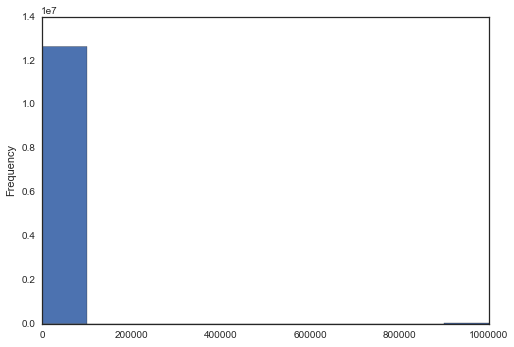

In [12]:
df['IndividualRate'].plot.hist()

There is obviously a problem with the individual rates. Let's try to find the outlieres by sorting the dataframe with respect to this column. We can find outliers at both ends of this sorted dataframe:

In [13]:
df.sort_values(by='IndividualRate') #na_position='first') # use na_position='first' to see the largest values in a long list

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
9231208,2016,GA,78196,HIOS,2,2015-07-07 02:38:10,78196,93-0242990,2016-01-01,2016-12-31,78196GA0030002,Rating Area 13,No Preference,49,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1331
6102571,2015,SC,89281,HIOS,5,2014-10-02 12:25:15,89281,95-6042390,2015-01-01,2015-12-31,89281SC0020002,Rating Area 43,No Preference,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1956
6102574,2015,SC,89281,HIOS,5,2014-10-02 12:25:15,89281,95-6042390,2015-01-01,2015-12-31,89281SC0010001,Rating Area 43,No Preference,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1956
6102575,2015,SC,89281,HIOS,5,2014-10-02 12:25:15,89281,95-6042390,2015-01-01,2015-12-31,89281SC0010002,Rating Area 43,No Preference,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1956
6102588,2015,SC,89281,HIOS,5,2014-10-02 12:25:15,89281,95-6042390,2015-01-01,2015-12-31,89281SC0010002,Rating Area 43,No Preference,31,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1957
6102589,2015,SC,89281,HIOS,5,2014-10-02 12:25:15,89281,95-6042390,2015-01-01,2015-12-31,89281SC0010001,Rating Area 43,No Preference,31,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1957
6102592,2015,SC,89281,HIOS,5,2014-10-02 12:25:15,89281,95-6042390,2015-01-01,2015-12-31,89281SC0020002,Rating Area 43,No Preference,31,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1957
6102594,2015,SC,89281,HIOS,5,2014-10-02 12:25:15,89281,95-6042390,2015-01-01,2015-12-31,89281SC0020001,Rating Area 43,No Preference,31,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1957
6102597,2015,SC,89281,HIOS,5,2014-10-02 12:25:15,89281,95-6042390,2015-01-01,2015-12-31,89281SC0020001,Rating Area 43,No Preference,32,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1958
6102599,2015,SC,89281,HIOS,5,2014-10-02 12:25:15,89281,95-6042390,2015-01-01,2015-12-31,89281SC0020002,Rating Area 43,No Preference,32,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1958


We can fix the 0, 999999, etc, entries by specifying a list of NaN values before reading in the CSV file. We can also leave out some of the columns to save memory.

In [14]:
na_values = ['NaN', 'N/A', '0', '0.01', '9999', '9999.99', '999999']
df = pd.read_csv("Rate.csv", na_values=na_values, usecols=['BusinessYear', 'StateCode', 'PlanId', 'RatingAreaId','Tobacco', 'Age', 'IndividualRate','IndividualTobaccoRate','Couple', 'PrimarySubscriberAndOneDependent', 'PrimarySubscriberAndTwoDependents', 'PrimarySubscriberAndThreeOrMoreDependents', 'CoupleAndOneDependent', 'CoupleAndTwoDependents', 'CoupleAndThreeOrMoreDependents'])

Now we should get rid of duplicates within this reduced dataframe:

In [15]:
df = df.drop_duplicates().reset_index(drop=True)

In [16]:
df.shape

(12442241, 15)

**Third finding:** The raw dataset was quite clean already. Only about 250,000 rows in the dataframe contained (for our purposes) redundant data. 

For the further analysis, we will focus on 15 of the 24 columns.

## More data cleaning based on a first in-depth look at the data with some basic plots

The data covers three consecutive years. Let's see how the years compare.

In [17]:
df["BusinessYear"].value_counts()

2015    4585265
2016    4180939
2014    3676037
Name: BusinessYear, dtype: int64

The data seems to be more or less evenly distributed over the three years. Let's have a look at trends over the years.

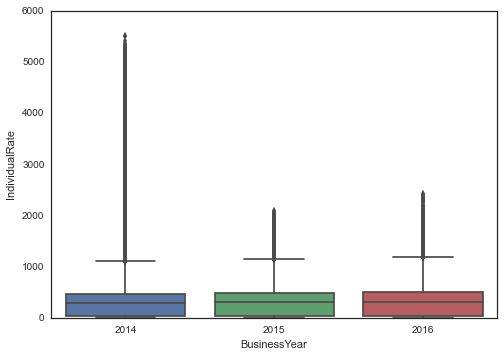

In [18]:
#sns.violinplot(x="BusinessYear", y="IndividualRate", data=df)
sns.boxplot(x="BusinessYear", y="IndividualRate", data=df)

What's going on in 2014? These outliers make the boxchart unreadable. Let's break it down by states to narrow down the outliers. 

But first let's make sure that the output is in alphabetical order.

In [19]:
Statelist = df['StateCode'].unique()
Statelist = np.sort(Statelist)

Now with this sorted list of state names, we can make a boxplot for all 34 states.

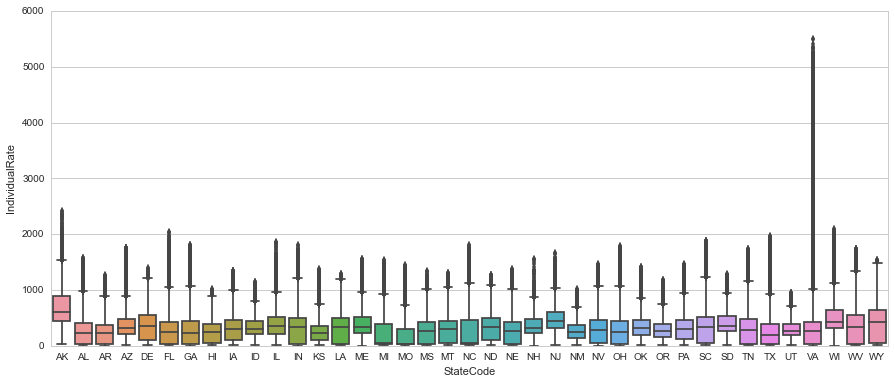

In [20]:
plt.figure(figsize=(15, 6))
sns.set_style("whitegrid")
sns.boxplot(x="StateCode", y="IndividualRate", data=df, order=Statelist)

What's going on in Virginia? It's this one state that's causing the outliers in the 2014 statistics. Let's look at VA in 2014 in more detail.

### The case of Virginia

For the further exploration, it's convenient to split the dataframe into three separate dataframes.

In [21]:
df2014 = df[df['BusinessYear'].isin([2014])].copy()
df2015 = df[df['BusinessYear'].isin([2015])].copy()
df2016 = df[df['BusinessYear'].isin([2016])].copy()

In [22]:
df2014.describe()

,BusinessYear,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
count,3676037,3549143.000000,1601995.000000,9078.000000,9078.000000,9078.000000,9078.000000,9078.000000,9078.000000,9078.000000
mean,2014,317.420019,560.159229,48.318870,48.799154,68.371658,92.581684,71.081461,90.425835,114.622133
std,0,287.629720,334.529592,19.841312,18.060111,29.339670,45.725490,30.832572,42.059903,58.095334
min,2014,6.000000,55.660000,10.000000,10.000000,22.000000,22.000000,22.000000,22.000000,22.000000
25%,2014,32.880000,341.200000,31.570000,33.590000,44.460000,53.670000,48.452500,61.860000,73.900000
50%,2014,293.700000,475.960000,46.355000,47.735000,69.485000,96.300000,71.330000,93.490000,119.640000
75%,2014,460.940000,695.310000,60.360000,60.360000,87.470000,121.387500,90.937500,117.405000,151.345000
max,2014,5503.850000,6604.610000,182.400000,169.650000,248.110000,357.940000,260.850000,339.310000,449.140000


The 2014 data looks similar to the 2014-1016 dataset. But with just 1/3 of the rows it's much easier to handle.

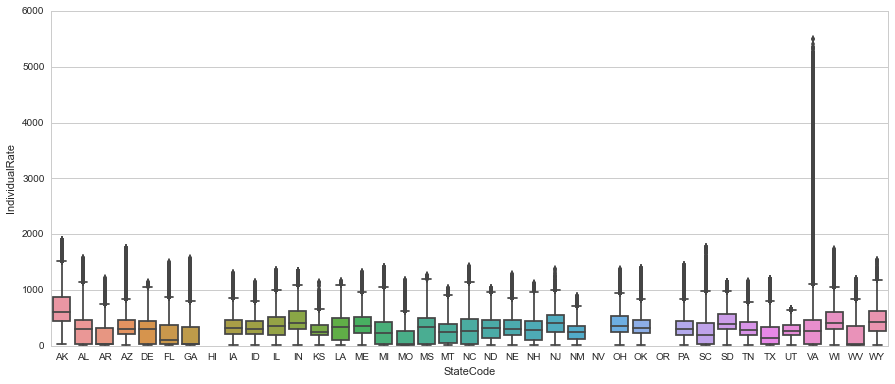

In [23]:
plt.figure(figsize=(15, 6))
sns.set_style("whitegrid")
sns.boxplot(x="StateCode", y="IndividualRate", data=df2014, order=Statelist)

Now we should look at Virginia in more detail. Working with the data gets much more pleasant when we create a separate Virginia 2014 dataframe: 

In [24]:
df2014_va = df2014[df2014['StateCode'].isin(['VA'])].copy()

In [25]:
df2014_va.shape

(119574, 15)

In [26]:
df2014_va.describe()

,BusinessYear,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
count,119574,115254.000000,61318.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,2014,396.495291,768.124408,46.957630,48.706185,63.087185,79.605333,67.665704,82.046667,98.564593
std,0,613.186797,863.353308,17.501699,20.158233,28.306539,40.991590,34.949403,43.313799,55.020378
min,2014,10.010000,63.390000,25.350000,25.350000,25.350000,25.350000,25.350000,25.350000,25.350000
25%,2014,31.840000,335.602500,31.180000,31.180000,31.180000,31.180000,31.180000,31.180000,31.180000
50%,2014,256.845000,473.315000,47.760000,47.370000,70.100000,91.605000,71.315000,94.760000,117.590000
75%,2014,460.087500,768.180000,59.290000,60.895000,85.370000,111.625000,92.137500,117.012500,141.272500
max,2014,5503.850000,6604.610000,86.750000,107.170000,112.280000,149.040000,151.120000,151.120000,187.810000


Maybe the ridiculously high rates are for old individuals. We should plot the plan costs by category 'Age' to see how prices compare across the individuals' ages. 

We have to exclude the "Family Option" rates first, since they are also a category of the 'Age' column.

In [27]:
exclude_list = df2014_va['Age'].isin(['Family Option'])
df2014_va_wofamily = df2014_va[~exclude_list]
age_labels = df2014_va_wofamily['Age'].unique()
age_labels = ['65+' if x=='65 and over' else x for x in age_labels]  #replace label '65 and over' with '65+' for plot labels
len(age_labels), age_labels

(46,
 ['0-20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '30',
  '31',
  '32',
  '33',
  '34',
  '35',
  '36',
  '37',
  '38',
  '39',
  '40',
  '41',
  '42',
  '43',
  '44',
  '45',
  '46',
  '47',
  '48',
  '49',
  '50',
  '51',
  '52',
  '53',
  '54',
  '55',
  '56',
  '57',
  '58',
  '59',
  '60',
  '61',
  '62',
  '63',
  '64',
  '65+'])

Now we can make a boxplot for each age group.

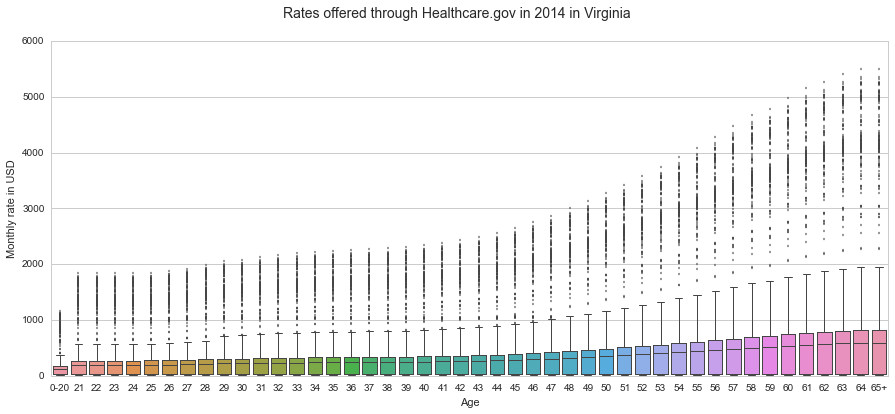

In [28]:
fig = plt.figure(figsize=(15, 6))
sns.set_style("whitegrid")

fig.suptitle('Rates offered through Healthcare.gov in 2014 in Virginia', fontsize=14)

ax = sns.boxplot(x="Age", y="IndividualRate", data=df2014_va_wofamily, linewidth=1.0, fliersize=2.0)
ax.set_ylabel("Monthly rate in USD")

# Customize x tick lables
xticks = np.arange(46)
ax.xaxis.set_ticks(xticks)
ax.set_xticklabels(age_labels)

plt.savefig('Virginia_rates_by_age.png', bbox_inches='tight', dpi=150)

**Fourth finding:** The large spread in premiums in Virginia is real. After some internet research it turns out that the wide range in monthly premiums in Virginia is due to plans covering gastric bypasses! In all other states, this type of surgery is covered by all plans, so the cost for these surgeries is distributed among all payees (http://www.webmd.com/health-insurance/20131011/why-some-virginia-health-plans-cost-so-much).

What about the really low premiums in Montana? Let's look into that.

### The case of Montana

We should create a small df for Montana 2014 to ease the exploration process

In [29]:
df2014_mo = df2014[df2014['StateCode'].isin(['MO'])].copy()

Montana seem to have a large number of plans with rates <$100. Let's look at a histogram:

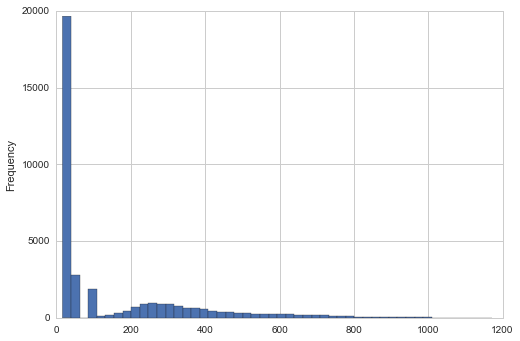

In [30]:
df2014_mo['IndividualRate'].plot.hist(50)

These low-cost plans make up the majority of plans, actually.

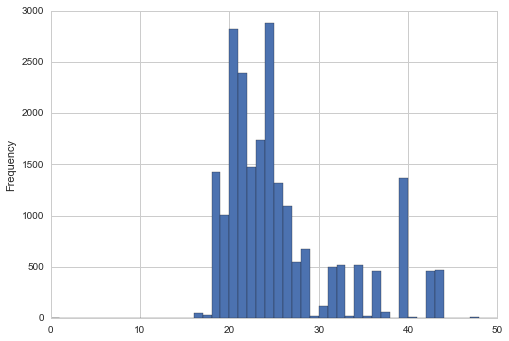

In [31]:
df2014_mo['IndividualRate'].plot.hist(50, range=(0, 50))

What's going on with these plans? Let's look at a summary of the Montana 2014 dataframe:

In [32]:
df2014_mo.describe()

,BusinessYear,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
count,40618,37018.000000,12512.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000
mean,2014,157.784407,483.698700,49.273913,50.552304,72.199000,99.969522,76.618478,98.264826,126.035652
std,0,207.228153,234.649054,11.172008,10.261092,16.476146,29.757290,15.987663,20.807315,32.921070
min,2014,16.140000,68.220000,32.280000,31.760000,44.350000,44.350000,47.900000,63.510000,70.210000
25%,2014,23.190000,314.490000,40.555000,43.200000,60.295000,79.712500,64.912500,82.810000,101.420000
50%,2014,32.050000,418.125000,48.610000,50.170000,70.475000,100.670000,75.050000,96.050000,123.935000
75%,2014,265.477500,608.855000,55.130000,56.425000,82.935000,116.547500,85.395000,110.420000,143.427500
max,2014,1170.570000,1463.190000,80.970000,80.160000,119.880000,179.450000,120.680000,160.400000,219.980000


It's interesting that all couple/family plans have a price range comparable to the low-price bump in the individual rates.

In [33]:
df2014_mo.head()

,BusinessYear,StateCode,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
1289292,2014,MO,29416MO0010001,Rating Area 1,No Preference,0-20,24.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1289293,2014,MO,29416MO0010002,Rating Area 1,No Preference,0-20,20.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1289294,2014,MO,29416MO0020001,Rating Area 1,No Preference,0-20,30.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1289295,2014,MO,29416MO0020002,Rating Area 1,No Preference,0-20,25.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1289296,2014,MO,29416MO0010003,Rating Area 1,No Preference,Family Option,26.37,NaN,52.74,50.89,75.42,109.75,77.26,101.79,136.12


** Fifth finding:** The low-cost plans are actually dental-only plans. We should exclude them if we want to say anything about health insurance premiums.

We can read in another CSV file that can give us some insights on which is which.

### Distinguishing between full plans and dental-only plans

The CSV file PlanAttributes.csv contains benefits, copays, deductibles and many more details of the individual health insurance plans. The file also lists full health insurance plans and dental-only plans. This is what we have to use to clean our dataset.

In [34]:
na_values = ['NaN', 'N/A', '0', '']
dental = pd.read_csv("PlanAttributes.csv", na_values=na_values)

/Users/akuepper/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0,7,8,9,10,11,12,13,14,15,18,19,20,22,23,24,25,26,27,28,29,31,32,33,34,39,40,41,42,66,67,68,70,71,72,75,76,77,79,80,81,82,84,85,86,88,89,90,92,93,94,96,97,98,136,137,138,140,141,142,145,146,147,150,151,152,154,155,156,158,159,160,162,163,164,166,167,168) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [35]:
dental.shape

(77353, 176)

In [36]:
dental.columns

Index(['AVCalculatorOutputNumber', 'BeginPrimaryCareCostSharingAfterNumberOfVisits', 'BeginPrimaryCareDeductibleCoinsuranceAfterNumberOfCopays', 'BenefitPackageId', 'BusinessYear', 'CSRVariationType', 'ChildOnlyOffering', 'ChildOnlyPlanId', 'CompositeRatingOffered', 'DEHBCombInnOonFamilyMOOP',
       ...
       'TEHBOutOfNetFamilyMOOP', 'TEHBOutOfNetFamilyPerGroupMOOP', 'TEHBOutOfNetFamilyPerPersonMOOP', 'TEHBOutOfNetIndividualMOOP', 'TIN', 'URLForEnrollmentPayment', 'URLForSummaryofBenefitsCoverage', 'UniquePlanDesign', 'VersionNum', 'WellnessProgramOffered'], dtype='object', length=176)

In [37]:
dental.head()

,AVCalculatorOutputNumber,BeginPrimaryCareCostSharingAfterNumberOfVisits,BeginPrimaryCareDeductibleCoinsuranceAfterNumberOfCopays,BenefitPackageId,BusinessYear,CSRVariationType,ChildOnlyOffering,ChildOnlyPlanId,CompositeRatingOffered,DEHBCombInnOonFamilyMOOP,DEHBCombInnOonFamilyPerGroupMOOP,DEHBCombInnOonFamilyPerPersonMOOP,DEHBCombInnOonIndividualMOOP,DEHBDedCombInnOonFamily,DEHBDedCombInnOonFamilyPerGroup,DEHBDedCombInnOonFamilyPerPerson,DEHBDedCombInnOonIndividual,DEHBDedInnTier1Coinsurance,DEHBDedInnTier1Family,DEHBDedInnTier1FamilyPerGroup,DEHBDedInnTier1FamilyPerPerson,DEHBDedInnTier1Individual,DEHBDedInnTier2Coinsurance,DEHBDedInnTier2Family,DEHBDedInnTier2FamilyPerGroup,DEHBDedInnTier2FamilyPerPerson,DEHBDedInnTier2Individual,DEHBDedOutOfNetFamily,DEHBDedOutOfNetFamilyPerGroup,DEHBDedOutOfNetFamilyPerPerson,DEHBDedOutOfNetIndividual,DEHBInnTier1FamilyMOOP,DEHBInnTier1FamilyPerGroupMOOP,DEHBInnTier1FamilyPerPersonMOOP,DEHBInnTier1IndividualMOOP,DEHBInnTier2FamilyMOOP,DEHBInnTier2FamilyPerGroupMOOP,DEHBInnTier2FamilyPerPersonMOOP,DEHBInnTier2IndividualMOOP,DEHBOutOfNetFamilyMOOP,DEHBOutOfNetFamilyPerGroupMOOP,DEHBOutOfNetFamilyPerPersonMOOP,DEHBOutOfNetIndividualMOOP,DentalOnlyPlan,DiseaseManagementProgramsOffered,EHBPediatricDentalApportionmentQuantity,EHBPercentPremiumS4,EHBPercentTotalPremium,FirstTierUtilization,FormularyId,FormularyURL,HIOSProductId,HPID,HSAOrHRAEmployerContribution,HSAOrHRAEmployerContributionAmount,ImportDate,IndianPlanVariationEstimatedAdvancedPaymentAmountPerEnrollee,InpatientCopaymentMaximumDays,IsGuaranteedRate,IsHSAEligible,IsNewPlan,IsNoticeRequiredForPregnancy,IsReferralRequiredForSpecialist,IssuerActuarialValue,IssuerId,IssuerId2,MEHBCombInnOonFamilyMOOP,MEHBCombInnOonFamilyPerGroupMOOP,MEHBCombInnOonFamilyPerPersonMOOP,MEHBCombInnOonIndividualMOOP,MEHBDedCombInnOonFamily,MEHBDedCombInnOonFamilyPerGroup,MEHBDedCombInnOonFamilyPerPerson,MEHBDedCombInnOonIndividual,MEHBDedInnTier1Coinsurance,MEHBDedInnTier1Family,MEHBDedInnTier1FamilyPerGroup,MEHBDedInnTier1FamilyPerPerson,MEHBDedInnTier1Individual,MEHBDedInnTier2Coinsurance,MEHBDedInnTier2Family,MEHBDedInnTier2FamilyPerGroup,MEHBDedInnTier2FamilyPerPerson,MEHBDedInnTier2Individual,MEHBDedOutOfNetFamily,MEHBDedOutOfNetFamilyPerGroup,MEHBDedOutOfNetFamilyPerPerson,MEHBDedOutOfNetIndividual,MEHBInnTier1FamilyMOOP,MEHBInnTier1FamilyPerGroupMOOP,MEHBInnTier1FamilyPerPersonMOOP,MEHBInnTier1IndividualMOOP,MEHBInnTier2FamilyMOOP,MEHBInnTier2FamilyPerGroupMOOP,MEHBInnTier2FamilyPerPersonMOOP,MEHBInnTier2IndividualMOOP,MEHBOutOfNetFamilyMOOP,MEHBOutOfNetFamilyPerGroupMOOP,MEHBOutOfNetFamilyPerPersonMOOP,MEHBOutOfNetIndividualMOOP,MarketCoverage,MedicalDrugDeductiblesIntegrated,MedicalDrugMaximumOutofPocketIntegrated,MetalLevel,MultipleInNetworkTiers,NationalNetwork,NetworkId,OutOfCountryCoverage,OutOfCountryCoverageDescription,OutOfServiceAreaCoverage,OutOfServiceAreaCoverageDescription,PlanBrochure,PlanEffictiveDate,PlanExpirationDate,PlanId,PlanLevelExclusions,PlanMarketingName,PlanType,QHPNonQHPTypeId,RowNumber,SBCHavingDiabetesCoinsurance,SBCHavingDiabetesCopayment,SBCHavingDiabetesDeductible,SBCHavingDiabetesLimit,SBCHavingaBabyCoinsurance,SBCHavingaBabyCopayment,SBCHavingaBabyDeductible,SBCHavingaBabyLimit,SecondTierUtilization,ServiceAreaId,SourceName,SpecialistRequiringReferral,SpecialtyDrugMaximumCoinsurance,StandardComponentId,StateCode,StateCode2,TEHBCombInnOonFamilyMOOP,TEHBCombInnOonFamilyPerGroupMOOP,TEHBCombInnOonFamilyPerPersonMOOP,TEHBCombInnOonIndividualMOOP,TEHBDedCombInnOonFamily,TEHBDedCombInnOonFamilyPerGroup,TEHBDedCombInnOonFamilyPerPerson,TEHBDedCombInnOonIndividual,TEHBDedInnTier1Coinsurance,TEHBDedInnTier1Family,TEHBDedInnTier1FamilyPerGroup,TEHBDedInnTier1FamilyPerPerson,TEHBDedInnTier1Individual,TEHBDedInnTier2Coinsurance,TEHBDedInnTier2Family,TEHBDedInnTier2FamilyPerGroup,TEHBDedInnTier2FamilyPerPerson,TEHBDedInnTier2Individual,TEHBDedOutOfNetFamily,TEHBDedOutOfNetFamilyPerGroup,TEHBDedOutOfNetFamilyPerPerson,TEHBDedOutO

Well, this is a big messy dataframe. We are only interested in the column DentalOnlyPlan. Let's have a look at it:

In [38]:
dental['DentalOnlyPlan'].unique()

array(['Yes', 'No'], dtype=object)

At least this one is clean!

If we want to merge this dataframe with our first ones from above, we have to make sure that we have one identifier on which we can actually merge them. PlanId seems to be a natural choice. Unfortunately, there is no PlanId in the dental dataframe. However, there is a HIOSProductId that seems to be related.

In [39]:
len(dental['HIOSProductId'].unique())

3497

In [40]:
len(df['PlanId'].unique())

16808

These PlanId's from the Rate.csv file are not exactly the same as the HIOSProductId's from the PlanAttributes.csv file. The format is similar: 29416MO0010001 versus 21989AK002. I can try to strip the last four digits from the PlanId's to see if the number of PlanId's and HIOSProductId's matches then.

In [41]:
Ids = df.PlanId
mod_Ids = [x[:-4] for x in Ids]
len(set(mod_Ids))

3498

There is one more element in the modified PlanId list than in the dental list. Let's find it.

In [42]:
set(mod_Ids)-set(dental['HIOSProductId'].unique())

{'19312TZ001'}

TZ is not a valid State abbreviation. There's a plan in Texas with name 19312TX001, though. So let's change this typo.

In [43]:
mod_Ids = ['19312TX001' if x=='19312TZ001' else x for x in mod_Ids]
set(mod_Ids)-set(dental['HIOSProductId'].unique())

set()

Well, there we go. That was easy. Now lets add these new labels as a new column to the original dataframe and then merge the dental dataframe.

In [44]:
df.loc[:,'HIOSProductId'] = pd.Series(mod_Ids, index=df.index)

In [45]:
df.shape

(12442241, 16)

Success. Let's do all this for the dfs of the individual three years

In [46]:
Ids_2014 = df2014.PlanId
mod_Ids_2014 = [x[:-4] for x in Ids_2014]
Ids_2015 = df2015.PlanId
mod_Ids_2015 = [x[:-4] for x in Ids_2015]
Ids_2016 = df2016.PlanId
mod_Ids_2016 = [x[:-4] for x in Ids_2016]

In [47]:
mod_Ids_2014 = ['19312TX001' if x=='19312TZ001' else x for x in mod_Ids_2014]
mod_Ids_2015 = ['19312TX001' if x=='19312TZ001' else x for x in mod_Ids_2015]
mod_Ids_2016 = ['19312TX001' if x=='19312TZ001' else x for x in mod_Ids_2016]

In [48]:
df2014.loc[:,'HIOSProductId'] = mod_Ids_2014
df2015.loc[:,'HIOSProductId'] = mod_Ids_2015
df2016.loc[:,'HIOSProductId'] = mod_Ids_2016

In [49]:
len(set(df2014['HIOSProductId']))

1836

In [50]:
df2014.shape

(3676037, 16)

Let's create a diet version of the dental DataFrame before we merge it with the dfs. We only need the DentalOnlyPlan column.

In [51]:
dental_diet = dental[['HIOSProductId', 'DentalOnlyPlan']].copy()
dental_diet.shape

(77353, 2)

In [52]:
dental_diet.head()

,HIOSProductId,DentalOnlyPlan
0,21989AK002,Yes
1,21989AK002,Yes
2,21989AK002,Yes
3,21989AK001,Yes
4,21989AK001,Yes


In [53]:
dental_diet['DentalOnlyPlan'].value_counts()

No     65704
Yes    11649
Name: DentalOnlyPlan, dtype: int64

Merging two dataframes can be a bit tricky. Since it is likely that we will have to try several times until it works the way we imagine them to be merged, we should test the merging process on a smaller df first. Let's use the 2014 df.

Now, not all the PlanId's are in the 2014 df. If we merge the full dental df with the 2014 df, we will get spurious rows with the PlanId's that are not used in 2014. We should create a 2014 dental df to avoid these spurious entries after merging.

In [54]:
not_in_2014 = set(dental_diet['HIOSProductId'])-set(df2014['HIOSProductId'])
exclude_list_2014 = dental_diet['HIOSProductId'].isin(not_in_2014)
dental_2014 = dental_diet[~exclude_list_2014].drop_duplicates().reset_index(drop=True)

In [55]:
dental_2014['DentalOnlyPlan'].value_counts()

Yes    1074
No      762
Name: DentalOnlyPlan, dtype: int64

And similar for 2015 and 2016:

In [56]:
not_in_2015 = set(dental_diet['HIOSProductId'])-set(df2015['HIOSProductId'])
exclude_list_2015 = dental_diet['HIOSProductId'].isin(not_in_2015)
dental_2015 = dental_diet[~exclude_list_2015].drop_duplicates().reset_index(drop=True)

In [57]:
not_in_2016 = set(dental_diet['HIOSProductId'])-set(df2016['HIOSProductId'])
exclude_list_2016 = dental_diet['HIOSProductId'].isin(not_in_2016)
dental_2016 = dental_diet[~exclude_list_2016].drop_duplicates().reset_index(drop=True)

Merging the slim dental dataframe with the full dataframe containing all rates across all three years crashes as the Jupyter notebook runs out of memory. Let's just merge the 2014, 2015 and 2016 dental df's with the df's of the individual years -- and let's save them right away as CSV files so that we can start our further analysis from there.

In [60]:
#df_merged = pd.merge(df, dental_diet, on='HIOSProductId',how='left', sort=False) # doesn't work, kernel will freeze as it runs out of memory
df2014_merged = pd.merge(df2014, dental_2014, on='HIOSProductId', how='inner', sort=False)

In [61]:
df2014_merged.shape

(3676037, 17)

In [62]:
df2014_merged.head()

,BusinessYear,StateCode,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,HIOSProductId,DentalOnlyPlan
0,2014,AK,21989AK0010001,Rating Area 1,No Preference,0-20,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21989AK001,Yes
1,2014,AK,21989AK0010001,Rating Area 1,No Preference,21,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21989AK001,Yes
2,2014,AK,21989AK0010001,Rating Area 1,No Preference,22,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21989AK001,Yes
3,2014,AK,21989AK0010001,Rating Area 1,No Preference,23,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21989AK001,Yes
4,2014,AK,21989AK0010001,Rating Area 1,No Preference,24,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21989AK001,Yes


Great, it worked! Let's see if there were any duplicates that we should drop:

In [63]:
df2014_cleaned = df2014_merged.drop_duplicates().reset_index(drop=True)

In [64]:
df2014_cleaned.shape

(3676037, 17)

No, the merging was clean. Great! 

How many dental only plans are there in 2014?

In [65]:
df2014_cleaned['DentalOnlyPlan'].value_counts()

No     2370659
Yes    1305378
Name: DentalOnlyPlan, dtype: int64

**Sixth finding:** One third of all listed plans are dental-only plans.

The goal was to remove these dental-only plans so that we can get some statistics on the prizes of health insurance plans for individuals. So let's get rid of the dental-only plans!

In [66]:
df2014_merged_nodental = df2014_cleaned[df2014_cleaned['DentalOnlyPlan'].isin(['No'])].copy()

In [67]:
df2014_merged_nodental.head()

,BusinessYear,StateCode,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,HIOSProductId,DentalOnlyPlan
1398,2014,AK,73836AK0620001,Rating Area 1,No Preference,0-20,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73836AK062,No
1399,2014,AK,73836AK0620001,Rating Area 1,No Preference,21,225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73836AK062,No
1400,2014,AK,73836AK0620001,Rating Area 1,No Preference,22,225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73836AK062,No
1401,2014,AK,73836AK0620001,Rating Area 1,No Preference,23,225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73836AK062,No
1402,2014,AK,73836AK0620001,Rating Area 1,No Preference,24,225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73836AK062,No


In [68]:
df2014_merged_nodental.shape

(2370659, 17)

This is slow and painful. We shouldn't have to do this more than once. Let's write the df to a file.

In [69]:
df2014_merged_nodental.to_csv("Rates2014.csv")

And repeat for the other years:

In [70]:
df2015_merged = pd.merge(df2015, dental_2015, on='HIOSProductId',how='inner', sort=False)

In [71]:
df2015_cleaned = df2015_merged.drop_duplicates().reset_index(drop=True)

In [72]:
df2015_merged_nodental = df2015_cleaned[df2015_cleaned['DentalOnlyPlan'].isin(['No'])]

In [73]:
df2015_merged_nodental.to_csv("Rates2015.csv")

In [74]:
df2016_merged = pd.merge(df2016, dental_2016, on='HIOSProductId',how='inner', sort=False)

In [75]:
df2016_cleaned = df2016_merged.drop_duplicates().reset_index(drop=True)

In [76]:
df2016_merged_nodental = df2016_cleaned[df2016_cleaned['DentalOnlyPlan'].isin(['No'])]

In [77]:
df2016_merged_nodental.to_csv("Rates2016.csv")

### The cleaned datasets for full health insurance plan rates (the case of Montana continued)

Now that we have removed all the dental-only plans, we can actually have a look at the distribution of plan rates in Montana.

We can either create a new Montana dataframe from the cleaned 2014 df, or quickly clean the Montana df. Let's do the latter. It's good exercise.

In [78]:
Ids_mo = df2014_mo.PlanId
mod_Ids_mo = [x[:-4] for x in Ids_mo]
len(set(mod_Ids_mo))

73

In [79]:
Ids_mo.shape

(40618,)

In [80]:
mod_Ids_mo = ['19312TX001' if x=='19312TZ001' else x for x in mod_Ids_mo]
set(mod_Ids_mo)-set(dental['HIOSProductId'].unique())

set()

In [81]:
df2014_mo.loc[:,'HIOSProductId']= mod_Ids_mo

In [82]:
df2014_mo.head()

,BusinessYear,StateCode,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,HIOSProductId
1289292,2014,MO,29416MO0010001,Rating Area 1,No Preference,0-20,24.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29416MO001
1289293,2014,MO,29416MO0010002,Rating Area 1,No Preference,0-20,20.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29416MO001
1289294,2014,MO,29416MO0020001,Rating Area 1,No Preference,0-20,30.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29416MO002
1289295,2014,MO,29416MO0020002,Rating Area 1,No Preference,0-20,25.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29416MO002
1289296,2014,MO,29416MO0010003,Rating Area 1,No Preference,Family Option,26.37,NaN,52.74,50.89,75.42,109.75,77.26,101.79,136.12,29416MO001


In [83]:
len(set(mod_Ids_mo)), len(set(df2014_mo['HIOSProductId'])), len(set(dental_diet['HIOSProductId']))

(73, 73, 3497)

In [84]:
not_in_mo = set(dental_diet['HIOSProductId'])-set(df2014_mo['HIOSProductId'])
exclude_list = dental_diet['HIOSProductId'].isin(not_in_mo)
len(exclude_list)

77353

In [85]:
dental_mo = dental_diet[~exclude_list].drop_duplicates().reset_index(drop=True)

dental_mo.head()

,HIOSProductId,DentalOnlyPlan
0,32753MO077,No
1,32753MO081,Yes
2,32753MO084,Yes
3,44527MO015,No
4,44527MO016,No


In [86]:
df2014_mo.tail()

,BusinessYear,StateCode,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,HIOSProductId
2538347,2014,MO,32753MO0930002,Rating Area 10,Tobacco User/Non-Tobacco User,61,1096.43,1370.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32753MO093
2538348,2014,MO,32753MO0930002,Rating Area 10,Tobacco User/Non-Tobacco User,62,1121.02,1401.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32753MO093
2538349,2014,MO,32753MO0930002,Rating Area 10,Tobacco User/Non-Tobacco User,63,1151.84,1439.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32753MO093
2538350,2014,MO,32753MO0930002,Rating Area 10,Tobacco User/Non-Tobacco User,64,1170.57,1463.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32753MO093
2538351,2014,MO,32753MO0930002,Rating Area 10,Tobacco User/Non-Tobacco User,65 and over,1170.57,1463.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32753MO093


In [87]:
df2014_mo_merged = pd.merge(df2014_mo, dental_mo, left_on='HIOSProductId', right_on='HIOSProductId', how='inner', sort=False)

In [88]:
df2014_mo_merged.shape

(40618, 17)

In [89]:
df2014_mo_cleaned = df2014_mo_merged.drop_duplicates().reset_index(drop=True)

In [90]:
df2014_mo_cleaned.shape

(40618, 17)

In [91]:
df2014_mo_merged_nodental = df2014_mo_cleaned[df2014_mo_cleaned['DentalOnlyPlan'].isin(['No'])]

In [92]:
df2014_mo_merged_nodental.shape

(12788, 17)

Clean! I'm excited to see the clean distribution of plan rates:

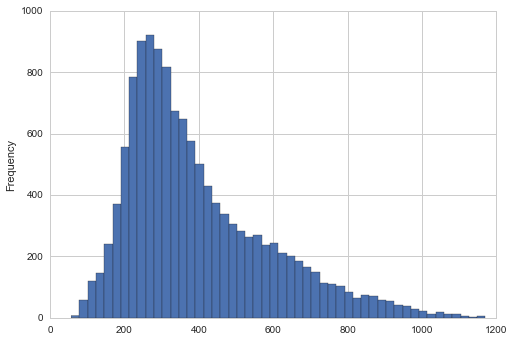

In [93]:
df2014_mo_merged_nodental['IndividualRate'].plot.hist(50)

Well that looks more like what I would have expected from the beginning. What's the median of this asymmetric distribution?

In [94]:
df2014_mo_merged_nodental['IndividualRate'].median()

343.015

**Seventh finding:** The median monthly premium in 2014 in Montana was about $340. That's a reasonable number!

## Enough Data Cleaning, on to some actual analysis

Let's continue breaking the whole dataset down by year to see some trends on the individual types of rates.

We can pick up here by reading in the saved, cleaned dataframes:

In [95]:
df2014 = pd.read_csv("Rates2014.csv")
df2015 = pd.read_csv("Rates2015.csv")
df2016 = pd.read_csv("Rates2016.csv")

In [96]:
df2014.describe()

,Unnamed: 0,BusinessYear,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
count,2370659.000000,2370659,2370659.000000,1601995.000000,0,0,0,0,0,0,0
mean,1870613.549387,2014,452.465814,560.159229,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1066629.852990,0,246.828415,334.529592,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1398.000000,2014,49.070000,55.660000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1055422.500000,2014,290.220000,341.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1815117.000000,2014,387.210000,475.960000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2754091.500000,2014,561.020000,695.310000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,3656258.000000,2014,5503.850000,6604.610000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Okay, something I didn't know: all the couple and family rates were dental-only plans. Maybe that was clear to anyone else. But I would call that our **eigth finding!**

In [97]:
df2014.median(numeric_only=True)

Unnamed: 0                                   1815117.00
BusinessYear                                    2014.00
IndividualRate                                   387.21
IndividualTobaccoRate                            475.96
Couple                                              NaN
PrimarySubscriberAndOneDependent                    NaN
PrimarySubscriberAndTwoDependents                   NaN
PrimarySubscriberAndThreeOrMoreDependents           NaN
CoupleAndOneDependent                               NaN
CoupleAndTwoDependents                              NaN
CoupleAndThreeOrMoreDependents                      NaN
dtype: float64

Let's compare smoker and non-smoker rates then! We can start with simple statistics such as median, mean and standard deviation:

In [98]:
dfmedian2014 = df2014[['IndividualRate','IndividualTobaccoRate']].median(numeric_only=True)
dfmedian2015 = df2015[['IndividualRate','IndividualTobaccoRate']].median(numeric_only=True)
dfmedian2016 = df2016[['IndividualRate','IndividualTobaccoRate']].median(numeric_only=True)
dfmean2014 = df2014[['IndividualRate','IndividualTobaccoRate']].mean(numeric_only=True)
dfmean2015 = df2015[['IndividualRate','IndividualTobaccoRate']].mean(numeric_only=True)
dfmean2016 = df2016[['IndividualRate','IndividualTobaccoRate']].mean(numeric_only=True)
dfstd2014 = df2014[['IndividualRate','IndividualTobaccoRate']].std(numeric_only=True)
dfstd2015 = df2015[['IndividualRate','IndividualTobaccoRate']].std(numeric_only=True)
dfstd2016 = df2016[['IndividualRate','IndividualTobaccoRate']].std(numeric_only=True)

We can combine these statistics in dataframes. This will enable us to plot them conveniently with Pandas and Seaborn.

In [99]:
dfmedians = pd.concat([dfmedian2014,dfmedian2015,dfmedian2016], keys=['2014', '2015', '2016'], axis=1)
dfmeans = pd.concat([dfmean2014,dfmean2015,dfmean2016], keys=['2014', '2015', '2016'], axis=1)
dfstd = pd.concat([dfstd2014,dfstd2015,dfstd2016], keys=['2014', '2015', '2016'], axis=1)
dfstd

,2014,2015,2016
IndividualRate,246.828415,229.156813,237.808886
IndividualTobaccoRate,334.529592,272.904169,272.979168


The standard deviation of the plan rates is quite high, and it's not really what I was interested in. We want to compare the medians of the plan rates for different categories. I would like to know how sensitive this statistic is to the sampling of the distribution function of plan rates. We can estimate that with bootstrapping:  

In [100]:
def bootstrap_resample(X, n=None):
    """ Bootstrap resample an array_like
    Parameters
    ----------
    X : array_like
      data to resample
    n : int, optional
      length of resampled array, equal to len(X) if n==None
    Results
    -------
    returns X_resamples
    """
    if isinstance(X, pd.Series):
        X = X.copy()
        X.index = range(len(X.index))
    if n == None:
        n = len(X)
        
    resample_i = np.floor(np.random.rand(n)*len(X)).astype(int)
    X_resample = np.array(X[resample_i])
    return X_resample

Using this simple bootstrap sampler, we can calculate a number of medians for different samples re-sampled from the distribution of plan rates. We can then look at the distribution of medians and calculate the standard deviation of this distribution to estimate an uncertainty of the median.

In [101]:
boots = 500  #number of bootstrap samples; 100 take about 5 minutes

dfs = [df2014,df2015,df2016] #do this for all three dataframes, and for smokers and non-smokers separately
stds = []  
stds_smoker = []


for frame in dfs:
    medians = np.zeros(boots)
    medians_smoker = np.zeros(boots)
    for i in medians:
        df_resampled_ind = bootstrap_resample(frame['IndividualRate'])
        medians[i] = np.nanmedian(df_resampled_ind)
    for i in medians_smoker:
        df_resampled_smoker = bootstrap_resample(frame['IndividualTobaccoRate'])
        medians_smoker[i] = np.nanmedian(df_resampled_smoker)
    stds.append(np.std(medians))
    stds_smoker.append(np.std(medians_smoker))

/Users/akuepper/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/akuepper/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:16: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [102]:
stds, stds_smoker

([17.29119061592926, 18.026567712118691, 19.074234352801678],
 [21.256240268834006, 20.039696020399106, 20.905752217825121])

**Ninth finding:** The medians are pretty stable to about $20. This means the distribution functions of plan rates are well sampled.

Let's replace the standard deviations of the prize distributions with these new median uncertainties, which are more interesting for our purposes.

In [103]:
dfstd['2014']['IndividualRate'] = stds[0]
dfstd['2015']['IndividualRate'] = stds[1]
dfstd['2016']['IndividualRate'] = stds[2]
dfstd['2014']['IndividualTobaccoRate'] = stds_smoker[0]
dfstd['2015']['IndividualTobaccoRate'] = stds_smoker[1]
dfstd['2016']['IndividualTobaccoRate'] = stds_smoker[2]
dfstd

,2014,2015,2016
IndividualRate,17.291191,18.026568,19.074234
IndividualTobaccoRate,21.256240,20.039696,20.905752


We can use these uncertainties now to see if there has been a significant increase in the median prize rates between 2014 and 2016.

/Users/akuepper/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


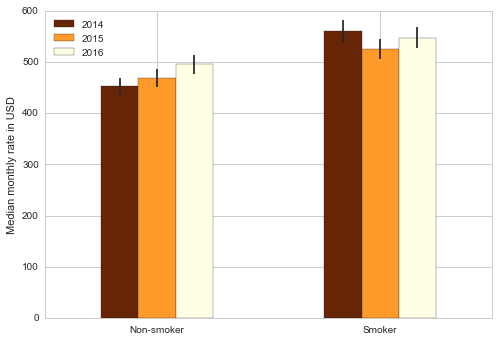

In [104]:
fig = plt.figure(figsize=(6, 6))

ax = dfmeans.plot.bar(yerr=dfstd, rot=0, colormap='YlOrBr_r')
ax.set_ylabel("Median monthly rate in USD")
ax.set_xlabel("")

# Customize x tick lables
labels = ['Non-smoker', 'Smoker']
xticks = [0,1]
ax.xaxis.set_ticks(xticks)
ax.set_xticklabels(labels)

plt.savefig('Overall_rates.png', bbox_inches='tight', dpi=150)

**Tenth finding:** There has been a significant increase in premiums for non-smokers in the years 2014-2016. In the same period, the median rates for smokers remained roughly constant. 

Let us look at the individual rates for each of the three years broken down by states. Did the prizes go up in all of the states?

In [105]:
Statelist = df['StateCode'].unique()
Statelist = np.sort(Statelist)

2016 first. We can use Seaborn's barplot to show the data for the 38 states. It offers us the possibility to select an estimator for a quanity that we want to compare across categories (which we can set to numpy's median) and even includes a bootstrapping routine like the one we used above.

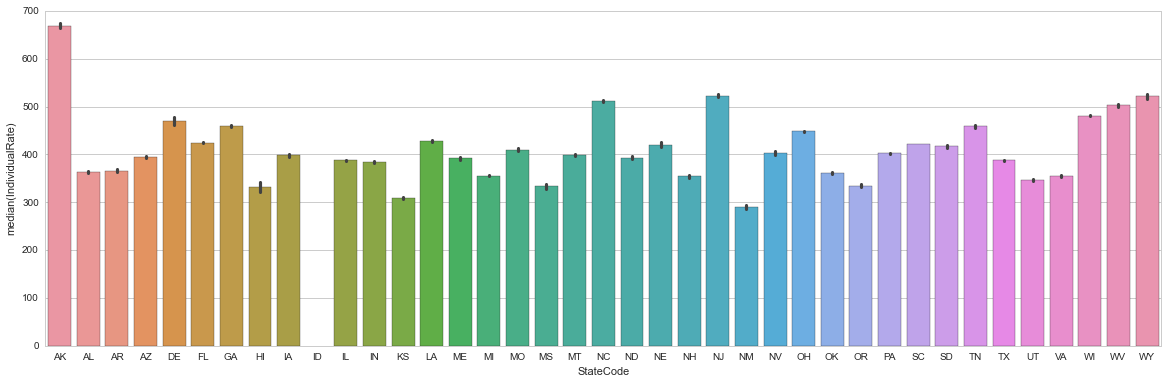

In [106]:
plt.figure(figsize=(20, 6))
sns.set_style("whitegrid")
sns.barplot(x=df2016['StateCode'], y=df2016['IndividualRate'], order=Statelist, estimator=np.median, ci=95, n_boot=1000)

**Eleventh finding:** median health insurance rates for non-smokers (and smokers as well) vary strongly between the states that participated in the health insurace marketplace.

Let's also look at the other years. 2015:

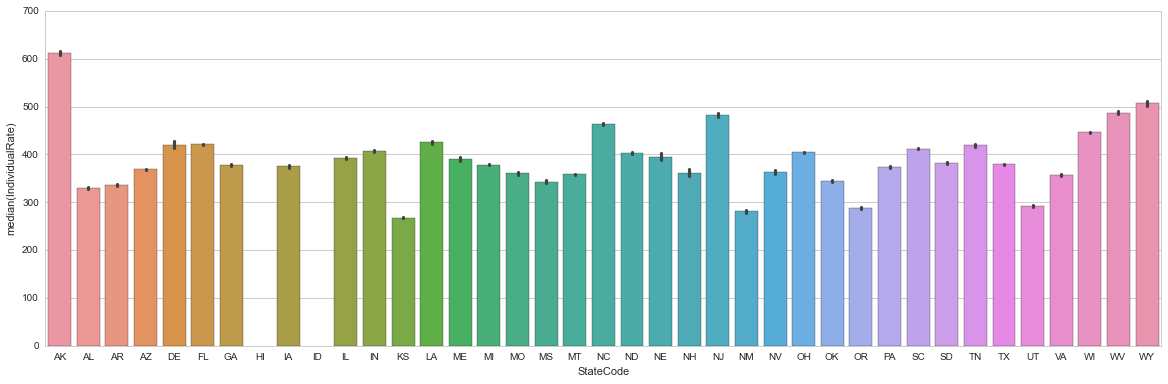

In [107]:
plt.figure(figsize=(20, 6))
sns.set_style("whitegrid")
sns.barplot(x=df2015['StateCode'], y=df2015['IndividualRate'], order=Statelist, estimator=np.median, ci=95, n_boot=1000)

2014:

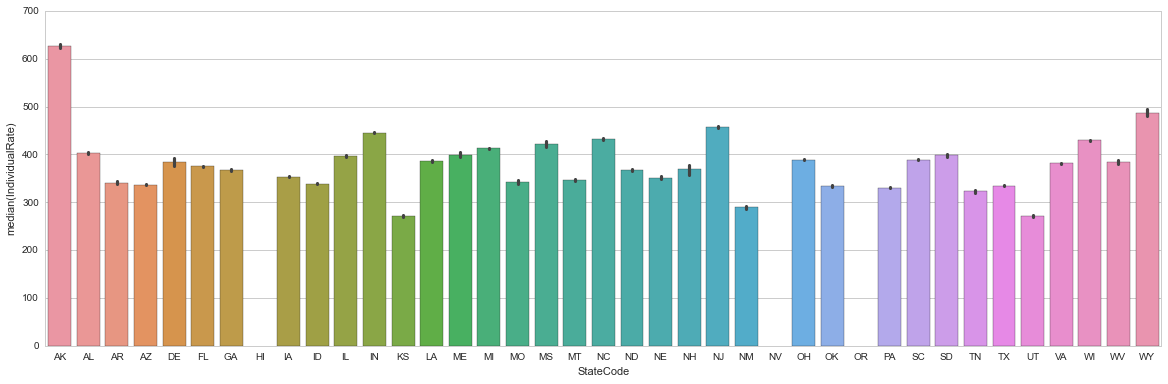

In [108]:
plt.figure(figsize=(20, 6))
sns.set_style("whitegrid")
sns.barplot(x=df2014['StateCode'], y=df2014['IndividualRate'], order=Statelist, estimator=np.median, ci=95, n_boot=1000)

**Twelfth finding:** Not all states participated in the federal health insurance marketplace in all three years. 

Other than that, these three plots don't tell us much. We can combine all of them into one figure to see how the median rates changed with the years.

In [109]:
df = pd.concat([df2014,df2015,df2016])

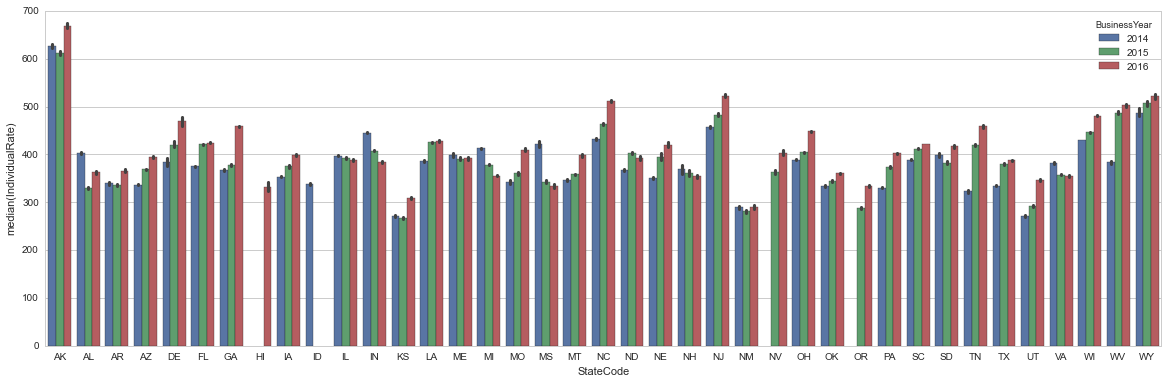

In [110]:
plt.figure(figsize=(20, 6))
sns.set_style("whitegrid")
sns.barplot(x=df['StateCode'], y=df['IndividualRate'], hue=df['BusinessYear'], order=Statelist, estimator=np.median, ci=95, n_boot=100)

**Thirteenth finding:** Median plan rates significantly increased for about 25 states that participated in the marketplace between 2014 and 2016. A decrease can be observed in about 8 states.

Let's make a sorted comparison plot of median, non-smoker plan rates across all states that participated in the program.

In [111]:
Statelist = df['StateCode'].unique()
State_medians = [] 
for state in Statelist:
    State_medians.append(np.median(df[df['StateCode'].isin([state])].IndividualRate))

First we make a list of the states in the dataset.

In [112]:
Statelist

array(['AK', 'AL', 'AZ', 'FL', 'GA', 'IN', 'LA', 'MO', 'MS', 'NC', 'ND',
       'NJ', 'OK', 'PA', 'SC', 'TN', 'TX', 'WI', 'WY', 'AR', 'DE', 'IL',
       'KS', 'ME', 'MI', 'MT', 'NH', 'NM', 'VA', 'WV', 'IA', 'ID', 'NE',
       'OH', 'SD', 'UT', 'NV', 'OR', 'HI'], dtype=object)

Then we add the median plan rates as a second column.

In [113]:
Statelist_ordered_by_rate = np.column_stack((np.asarray(Statelist), State_medians))
Statelist_ordered_by_rate

array([['AK', 632.76],
       ['AL', 373.33],
       ['AZ', 359.38],
       ['FL', 408.21],
       ['GA', 416.78],
       ['IN', 430.35],
       ['LA', 414.675],
       ['MO', 377.56],
       ['MS', 359.505],
       ['NC', 468.35],
       ['ND', 392.185],
       ['NJ', 495.65999999999997],
       ['OK', 345.22],
       ['PA', 359.9],
       ['SC', 414.52],
       ['TN', 405.03499999999997],
       ['TX', 367.06],
       ['WI', 455.63],
       ['WY', 509.5],
       ['AR', 347.705],
       ['DE', 434.2],
       ['IL', 392.52],
       ['KS', 280.685],
       ['ME', 393.37],
       ['MI', 387.505],
       ['MT', 368.605],
       ['NH', 358.175],
       ['NM', 286.33],
       ['VA', 364.55],
       ['WV', 477.62],
       ['IA', 368.19],
       ['ID', 338.94],
       ['NE', 372.915],
       ['OH', 416.3],
       ['SD', 396.305],
       ['UT', 300.53],
       ['NV', 384.695],
       ['OR', 308.0],
       ['HI', 332.29]], dtype=object)

This array we can sort by the premiums.

In [114]:
Statelist_ordered_by_rate = Statelist_ordered_by_rate[Statelist_ordered_by_rate[:, 1].argsort()]

Which we can then use as labels for our ordered plot.

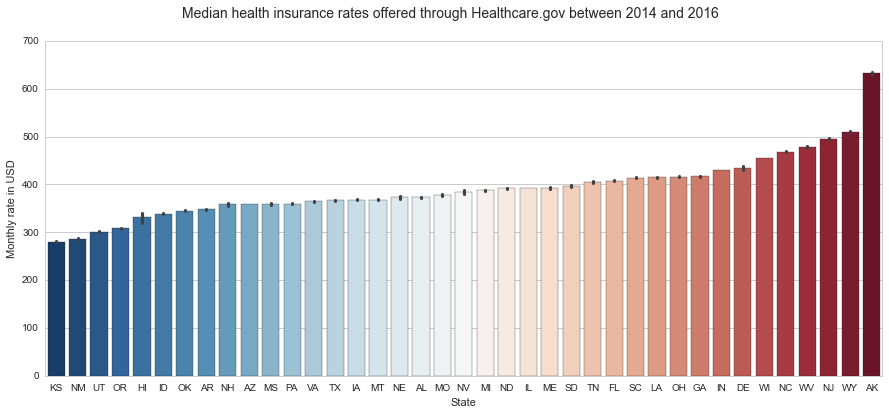

In [115]:
fig = plt.figure(figsize=(15, 6))
sns.set_style("whitegrid")

fig.suptitle('Median health insurance rates offered through Healthcare.gov between 2014 and 2016', fontsize=14)

ax = sns.barplot(x=df['StateCode'], y=df['IndividualRate'], order=Statelist_ordered_by_rate[:,0], estimator=np.median, ci=95, n_boot=100, palette="RdBu_r")
ax.set_ylabel("Monthly rate in USD")
ax.set_xlabel("State")

plt.savefig('Median_rates_by_state.png', bbox_inches='tight', dpi=150)

**Fourteenth finding:** health insurance for non-smoking individuals is cheapest in Kansas and most expensive in Alaska. The median rate is about twice as high in Alaska as it is in Kansas, New Mexico, Utah, Oregon or Hawaii. 